In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import layers, models

import seaborn as sns
# from pylab import rcParams
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

'''
register_matplotlib_converters()
sns.set(style="whitegrid", palette= "muted", font_scale =1.5)
rcParams['figure.figsize']=22,10
'''

2024-11-17 01:49:48.647738: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 01:49:48.670379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 01:49:48.670412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 01:49:48.671324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 01:49:48.677635: I tensorflow/core/platform/cpu_feature_guar

'\nregister_matplotlib_converters()\nsns.set(style="whitegrid", palette= "muted", font_scale =1.5)\nrcParams[\'figure.figsize\']=22,10\n'

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


2024-11-17 01:49:49.128615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:49.192529: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:49.192576: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:49.196726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:49.196770: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17182034393040605089
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22500343808
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1074801055428654644
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [3]:
# path_train = "/content/drive/MyDrive/Hackathon/Anomaly Detection/Dataset/train_data.npy"                # 'data/train_data.npy'
# path_test = "/content/drive/MyDrive/Hackathon/Anomaly Detection/Dataset/test_data.npy"
# path_test_label = "/content/drive/MyDrive/Hackathon/Anomaly Detection/Dataset/test_label.npy"

path_train = "../Dataset/train_data.npy"
path_test = "../Dataset/test_data.npy"
path_test_label = "../Dataset/test_label.npy"

df_train = pd.DataFrame(np.load(path_train))
df_test =  pd.DataFrame(np.load(path_test))
y_df_test =  pd.DataFrame(np.load(path_test_label))

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
2,0.0,0.005520,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
3,0.0,0.005801,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
4,0.0,0.005576,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [4]:
def data_engineering(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data)
    return scaled_df, scaler


df_train, train_scaler = data_engineering(df_train)
df_test, _ = data_engineering(df_test)

In [5]:
df_train = df_train.values.reshape((df_train.shape[0], df_train.shape[1], 1))
df_test = df_test.values.reshape((df_test.shape[0], df_test.shape[1], 1))

In [6]:
# LSTM model
'''
def get_model(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.LSTM(units=128, input_shape=input_shape))
    model.add(keras.layers.Dropout(rate=0.2))

    model.add(keras.layers.RepeatVector(n=input_shape[0]))
    model.add(keras.layers.LSTM(units=128, return_sequences=True))

    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=input_shape[1])))

    model.compile(loss='mae', optimizer='adam')
    return model


def get_lstm_autoencoder(input_shape):
    model = models.Sequential()

    # Encoder part: LSTM layers to learn the input sequence
    model.add(layers.LSTM(units=64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.RepeatVector(input_shape[0]))  # Repeat the encoded vector for the decoder

    # Decoder part: LSTM layers to reconstruct the original sequence
    model.add(layers.LSTM(units=64, activation='relu', return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(units=input_shape[1])))  # Reconstruct the sequence

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

'''


def get_lstm_autoencoder(input_shape):
    model = models.Sequential()

    # Encoder part: Stacked LSTM layers to learn the input sequence
    model.add(layers.LSTM(units=128, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(layers.Dropout(0.2))  # Regularization
    model.add(layers.LSTM(units=64, activation='relu', return_sequences=False))
    model.add(layers.RepeatVector(input_shape[0]))  # Repeat the encoded vector for the decoder

    # Decoder part: Stacked LSTM layers to reconstruct the original sequence
    model.add(layers.LSTM(units=64, activation='relu', return_sequences=True))
    model.add(layers.Dropout(0.2))  # Regularization
    model.add(layers.LSTM(units=128, activation='relu', return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(units=input_shape[1])))  # Reconstruct the sequence

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [7]:
input_shape = (df_train.shape[1], df_train.shape[2])
# model = get_model(input_shape)
model = get_lstm_autoencoder(input_shape)
model.summary()

2024-11-17 01:49:51.226162: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:51.226227: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:51.226245: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:51.226503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-17 01:49:51.226521: I tensorflow/core/common_runtime/gpu/gpu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 51, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 51, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVecto  (None, 51, 64)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 51, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 51, 64)            0         
                                                        

In [8]:
# Training
BATCH_SIZE = 128
N_STEPS = df_train.shape[1] // BATCH_SIZE
BESTMODELFILENAME = "../Dataset/bestModel_cgd.model.keras"
EPOCHS=50 #50

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience = 3,
    verbose=0,
    mode="auto",
    restore_best_weights = True)

model_bestpoint_callback = tf.keras.callbacks.ModelCheckpoint(BESTMODELFILENAME, monitor="val_loss", mode="min", verbose=1, save_best_only=True)
ReduceLROnPlateau_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-8)



history_lstm = model.fit(
    df_train, 
    df_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    #validation_split=0.2,
    #steps_per_epoch=N_STEPS,
    shuffle=True,
    callbacks=[early_stopping_callback, model_bestpoint_callback, ReduceLROnPlateau_callback])

Epoch 1/50


2024-11-17 01:49:54.837684: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdfc0a0e460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-17 01:49:54.837718: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-17 01:49:54.841205: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-17 01:49:54.852463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1731804594.892898   95089 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3868/3868 [==============================] - 899s 232ms/step - loss: 603123.3125 - lr: 0.0010
Epoch 2/50
3868/3868 [==============================] - 881s 228ms/step - loss: 2.3366 - lr: 0.0010
Epoch 3/50
3868/3868 [==============================] - 878s 227ms/step - loss: 447.9558 - lr: 0.0010
Epoch 4/50
3868/3868 [==============================] - 881s 228ms/step - loss: 0.7843 - lr: 0.0010
Epoch 5/50
3868/3868 [==============================] - 880s 227ms/step - loss: nan - lr: 0.0010
Epoch 6/50
3868/3868 [==============================] - 886s 229ms/step - loss: nan - lr: 0.0010
Epoch 7/50
3868/3868 [==============================] - 883s 228ms/step - loss: nan - lr: 0.0010
Epoch 8/50
3868/3868 [==============================] - 885s 229ms/step - loss: nan - lr: 0.0010
Epoch 9/50
3868/3868 [==============================] - 885s 229ms/step - loss: nan - lr: 0.0010
Epoch 10/50
3868/3868 [==============================] - 882s 228ms/step - loss: nan - lr: 0.0010
Epoch 11/50
3868/3868

In [9]:
def plot_metric(res, saveFileName, metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(res.history[metric_name], color="blue", label=metric_name)
    # plt.plot(res.history["val_" + metric_name], color="green", label="val_" + metric_name)
    plt.xlabel("#epochs")
    plt.ylabel(metric_name)
    plt.legend()
    plt.savefig(saveFileName, dpi=300)
    plt.show()

In [10]:
history_lstm.history

{'loss': [603123.3125,
  2.336632013320923,
  447.955810546875,
  0.7842810750007629,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001]}

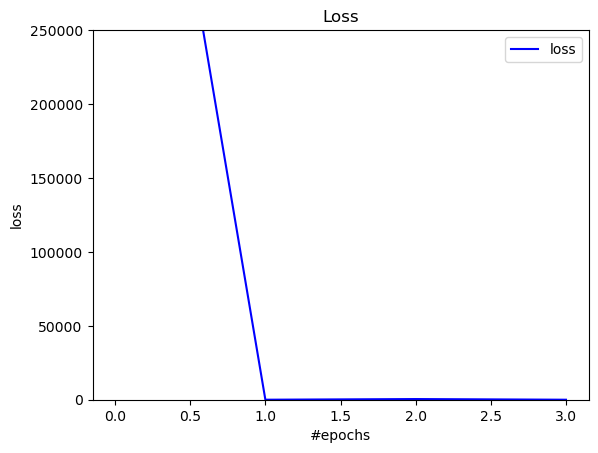

In [11]:
LOSSFILENAME = "./loss_file.png"
ACCFILENAME = "./acc_file.png"
plot_metric(history_lstm, saveFileName=LOSSFILENAME, metric_name="loss", title="Loss", ylim=250000)
# plot_metric(history_lstm, saveFileName=ACCFILENAME, metric_name="sparse_categorical_accuracy", title="Accuracy", ylim=1.0)

14060/14060 [==============================] - 403s 29ms/step


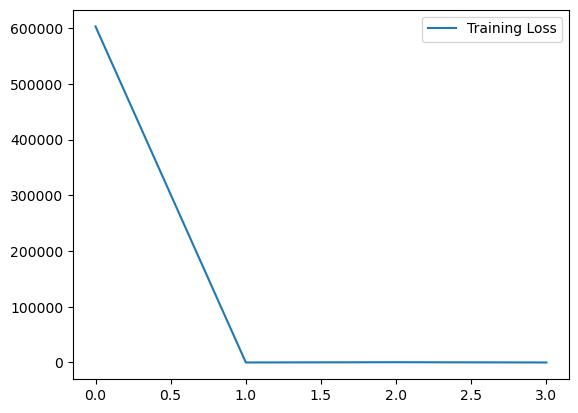

In [12]:
test_predictions = model.predict(df_test)

# Visualization
plt.plot(history_lstm.history['loss'], label='Training Loss')
# plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Calculate reconstruction error
reconstruction_error = np.mean(np.power(df_test - test_predictions, 2), axis=1)

# Set a threshold for anomaly detection (e.g., 95th percentile)
percentile = 95
threshold = np.percentile(reconstruction_error, percentile)
# Identify anomalies
predicted_anomalies = reconstruction_error > threshold

# Calculate F1 score
f1 = f1_score(y_df_test, predicted_anomalies)
accuracy = accuracy_score(y_df_test, predicted_anomalies)
precision = precision_score(y_df_test, predicted_anomalies)
recall = recall_score(y_df_test, predicted_anomalies)

print(f"percentile {percentile}")
print(f"Number of predicted anomalies {predicted_anomalies.sum()}: Number of actual anomalies {y_df_test.sum()}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

percentile 95
Number of predicted anomalies 0: Number of actual anomalies 0    54584
dtype: int64
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1-score: 0.00
